In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

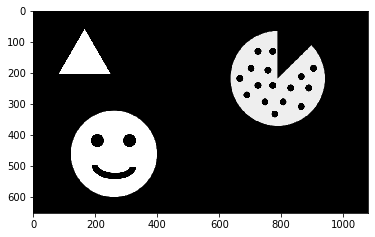

In [2]:
img = cv2.imread("C:/Users/dell/Documents/Udemy OpenCV course/internal_external.png",0)
plt.imshow(img, cmap='gray')

In [3]:
img.shape

(652, 1080)

### findContours

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

1.cv2.RETR_EXTERNAL:Only extracts external contours

2.cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy

3.cv2.RETR_TREE: Extracts both internal and external contours organized in a tree graph

4.cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [6]:
pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.7
anaconda-project==0.8.3
asn1crypto==0.24.0
astroid==2.2.5
astropy==3.2.1
atomicwrites==1.3.0
attrs==19.1.0
Babel==2.7.0
backcall==0.1.0
backports.functools-lru-cache==1.6.3
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.7.1
bitarray==0.9.3
bkcharts==0.2
bleach==3.1.0
bokeh==1.2.0
boto==2.49.0
Bottleneck==1.2.1
certifi==2019.6.16
cffi==1.12.3
chardet==3.0.4
Click==7.0
cloudpickle==1.2.1
clyent==1.2.2
colorama==0.4.1
comtypes==1.1.7
conda==4.9.2
conda-build==3.18.8
conda-package-handling==1.3.11
conda-verify==3.4.2
contextlib2==0.5.5
cryptography==2.7
cycler==0.10.0
Cython==0.29.14
cytoolz==0.10.0
dask==2.1.0
decorator==4.4.0
defusedxml==0.6.0
distributed==2.1.0
docutils==0.14
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
filelock==3.0.12
Flask==1.1.1
future==0.18.2
gensim==3.8.3
gevent==1.4.0
glob2==0.7
greenlet==0.4.15
h5py==2.9.

1. For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
2. Since OpenCV 3.2, findContours() no longer modifies the source image.
3. In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.**

In [7]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [8]:
type(contours)

list

In [9]:
len(contours)

22

In [14]:
contours

[array([[[247, 322]],
 
        [[246, 323]],
 
        [[240, 323]],
 
        [[239, 324]],
 
        [[233, 324]],
 
        [[232, 325]],
 
        [[229, 325]],
 
        [[228, 326]],
 
        [[225, 326]],
 
        [[224, 327]],
 
        [[221, 327]],
 
        [[220, 328]],
 
        [[218, 328]],
 
        [[217, 329]],
 
        [[215, 329]],
 
        [[214, 330]],
 
        [[213, 330]],
 
        [[212, 331]],
 
        [[210, 331]],
 
        [[209, 332]],
 
        [[207, 332]],
 
        [[206, 333]],
 
        [[205, 333]],
 
        [[204, 334]],
 
        [[203, 334]],
 
        [[202, 335]],
 
        [[201, 335]],
 
        [[200, 336]],
 
        [[198, 336]],
 
        [[197, 337]],
 
        [[196, 337]],
 
        [[195, 338]],
 
        [[194, 338]],
 
        [[192, 340]],
 
        [[191, 340]],
 
        [[190, 341]],
 
        [[189, 341]],
 
        [[187, 343]],
 
        [[186, 343]],
 
        [[185, 344]],
 
        [[184, 344]],
 
        [[182, 3

In [10]:
type(hierarchy)

numpy.ndarray

In [11]:
hierarchy.shape

(1, 22, 4)

In [12]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [13]:
external_contours = np.zeros(shape=img.shape)

In [15]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1 :
        
        cv2.drawContours(external_contours, contours, i ,(255,255,255), -1)

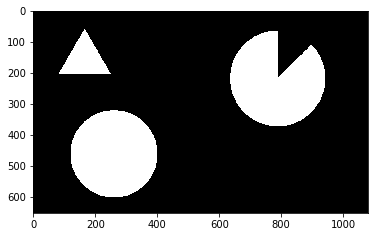

In [16]:
plt.imshow(external_contours, cmap='gray')

In [21]:
internal_contours = np.zeros(shape=img.shape)

In [22]:
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1 :
        
        cv2.drawContours(internal_contours, contours, i ,(255,255,255), -1)

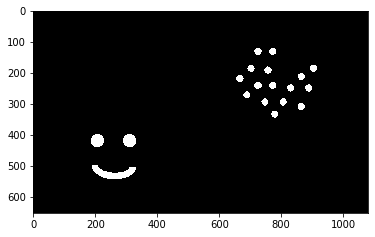

In [23]:
plt.imshow(internal_contours, cmap='gray')

In [24]:
internal_contours_grouping = np.zeros(shape=img.shape)

In [25]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == 4 :
        
        cv2.drawContours(internal_contours_grouping, contours, i ,(255,255,255), -1)

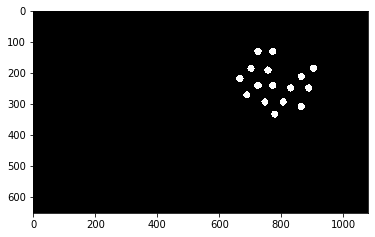

In [26]:
plt.imshow(internal_contours_grouping, cmap='gray')

In [27]:
internal_contours_grouping = np.zeros(shape=img.shape)

In [28]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == 0 :
        
        cv2.drawContours(internal_contours_grouping, contours, i ,(255,255,255), -1)

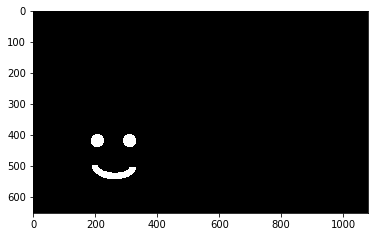

In [29]:
plt.imshow(internal_contours_grouping, cmap='gray')